<a href="https://colab.research.google.com/github/ijenims/paiza/blob/main/Paiza_Stack_Que.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# スタック・キューメニュー

### [Template] ローカルでコードテスト環境を作る(Python,jupyter)

https://qiita.com/ryamamon/items/15ca78a0234d9d24452d

In [16]:
from ipywidgets import Textarea

def input():
    global input_count
    input_text = Input.split('\n')[input_count]
    input_count += 1

    return input_text


def get_input(change):
    global Input
    Input = change['new']


textarea = Textarea()
textarea.observe(get_input, names='value')


### 入力テキストボックス（要実行）

In [17]:
display(textarea)

Textarea(value='')

<font color="Red">カウンタをゼロにしておく！！！</font>
（各ソースコードにコピペ）

In [ ]:
input_count = 0    # Reset counter

### ここからソースコード（実行不要）

In [ ]:
input_count = 0

n = input()
print(n)
lst = input().split()
print(lst)
w = input()
print(w)

5
['1', '-2', '3', '-4', '5', '-6']
text


In [ ]:
# これは旧コード

n, *a = Input.split()
print(n, a)
print(Input)
Input

5 ['1', '-2', '3', '-4', '5', '-6', 'text']
5
1 -2 3 -4 5 -6
text


'5\n1 -2 3 -4 5 -6\ntext'

In [ ]:
n = Input
print(n)

5
1 -2 3 -4 5 -6
text


### =========================================================================

## 箱とボール

### <font color="Red">FINAL問題</font> 箱とボール (paizaランク B 相当)

#### Task

幅 1 の筒状の箱に数値の書かれた直径 1 のボールを入れます。各ボールは同じ数値のボールが隣合ったときに結合し、数値が 2 倍になります。それぞれ A_i と書かれた N 個のボールがあり、順番に箱の底へ入れていきます。最終的な箱の中のようすを、箱の天井から順に出力してください。

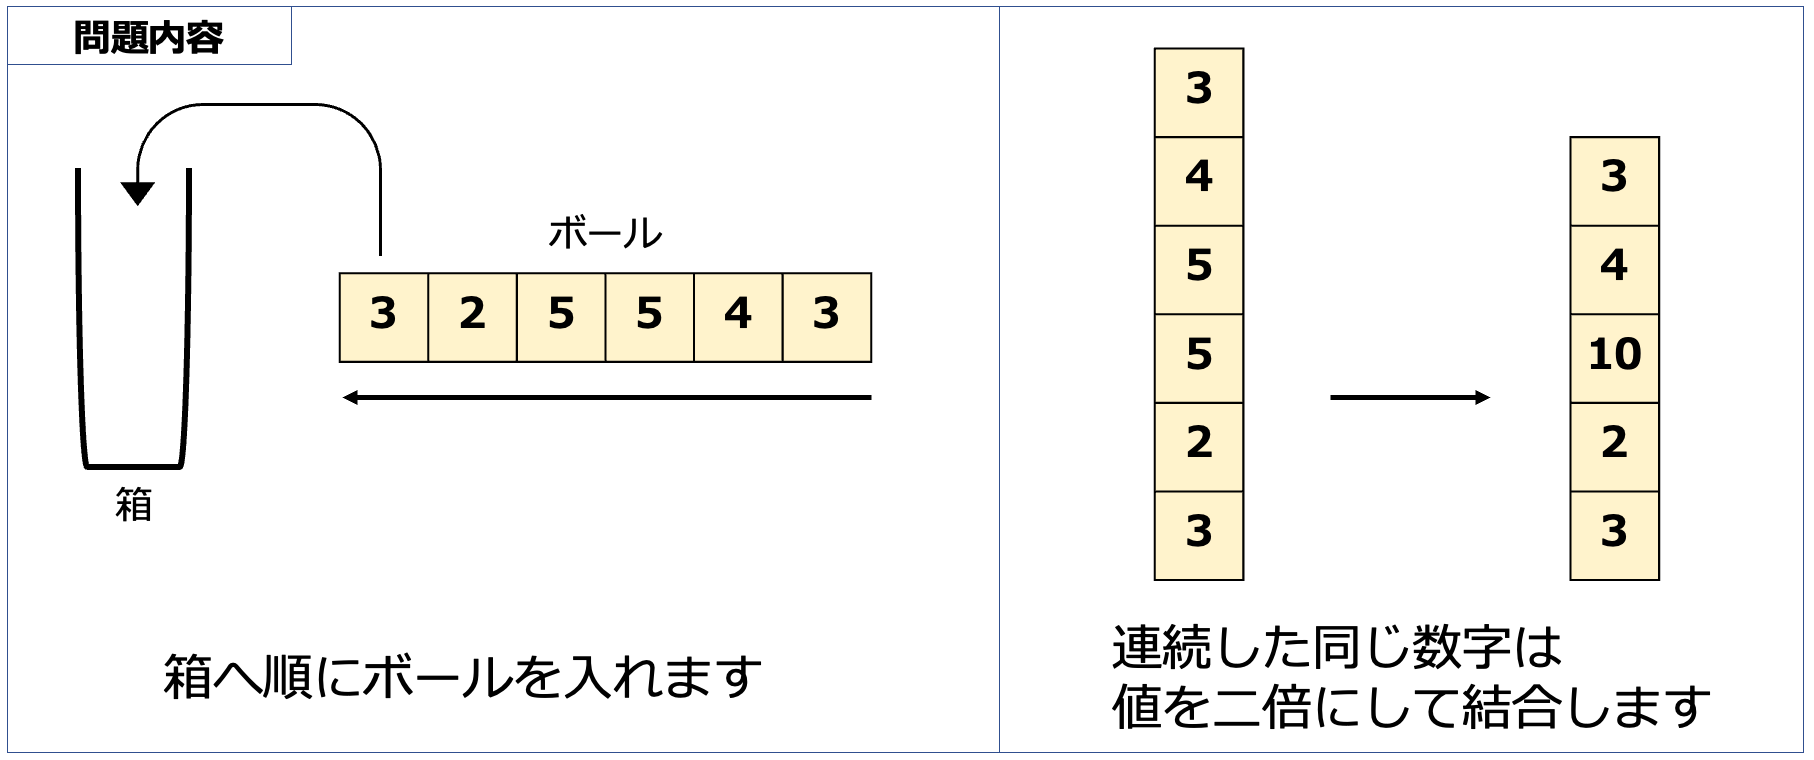

input
```
N
A_0 A_1 ... A_N
```

output

最終的な箱の中のようすを、箱の天井から順に出力してください。末尾には改行を入れ、余計な文字、空行を含んではいけません。

conditions

・ N は 1 以上 50,000 未満<br>
・ 0 ≦ A_i < 50,000

input_1
```
6
3 2 5 5 4 3
```
output_1
```
3
4
10
2
3
```
input_2
```
6
1 1 2 4 8 16
```
output_2
```
32
```

#### Code

方針

- N: 個数, A: 数列 の入力
- stuck の準備
- Append する数字と stuck の最後尾を比較
  - 違う場合：
    - そのまま stuck に追加
  - 同じ場合：
    - 最後尾を2倍する
    - 最後尾の１つ前と最後尾を比較（以下同様）：再帰関数
    
- stuck の内容を最後尾より１つずつ改行して表示

In [27]:
# 2022.3.28

# Status : Ready

input_count = 0    # Reset counter

def combine(s, i):
    # s: list
    # i: int
    s[-1] = 2 * i
    
    if s[-2] != s[-1]:
        return s
    else:
        acc = s.pop()
        combine(s, acc)


def main():
    N = int(input())
    A = [int(x) for x in input().split()]

    stuck = [0]    # IndexError を避ける

    for i in A:
        if stuck[-1] != i:
            stuck.append(i)
        else:
            combine(stuck, i)

    print(stuck)

    while len(stuck) > 1:
        print(stuck.pop())

main()

[0, 32, 24]
24
32


### STEP: 5 エスカレーター (paizaランク B 相当)

#### Task

paiza ビルにあるエスカレーターは全長 K メートルあり、 1 秒で 1 メートル進みます。また paiza ビルに勤める社員が N 人おり、 i 番目の社員は時刻 A_i にエスカレーターに乗ります。各社員がエスカレーターに乗った直後に、エスカレーター上にいる人数をそれぞれ答えてください。ただしある時刻にエスカレーターに乗る社員と降りる社員がいた場合、これは同時におこなわれます。

この問題は少し難しいですが、キューを用いて実装してみましょう。なお、サンプル 1 のケースでは以下のように社員がエスカレーターに乗ります。

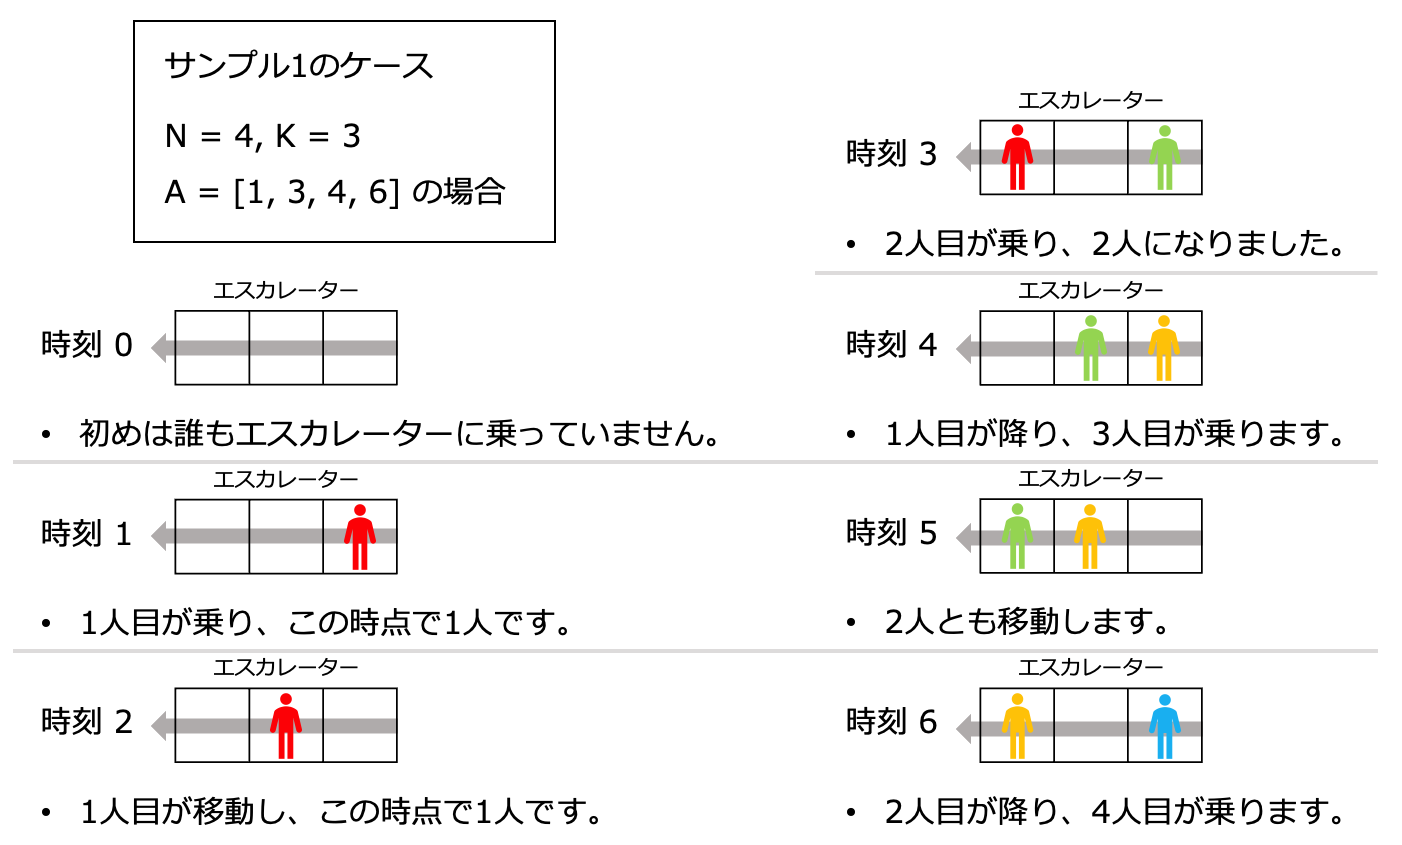

input
```
N K
A_1 ... A_N
```

output

社員 i がエスカレーターに乗った直後に、エスカレーター上にいる人数 E_i を改行区切りで出力してください。末尾には改行を入れ、余計な文字、空行を含んではいけません。
```
E_1
...
E_N
```


conditions

・ N, A_i は 1 以上 50,000 未満<br>
・ 1 ≦ A_1 < ... < A_N < 50,000<br>
・ K は 1 以上 100 未満

input_1
```
4 3
1 3 4 6
```
output_1
```
1
2
2
2
```

#### Code

方針

- N: 社員数, K: エスカレータ長さを入力
- A: 乗り込み時刻リストを入力
- a_one_hot: A をワンホットリストにする（< 50,000）
- s: 時刻全体の部分和リストを作成
- 時刻 0 の時用に先頭に 0 を K 個準備
- キューを s の先頭をずらすことにより実現
- 部分和の問題として解く

In [15]:
# 2022.3.28

# Status : Completed 3.28

input_count = 0    # Reset counter

def main():
    N, K = map(int, input().split())
    A = [int(x) for x in input().split()]
    s = [0 for _ in range(K)]
    print(A)

    a_one_hot = [0 for _ in range(max(A) + 1)]
    print(a_one_hot)

    for i in A:
        a_one_hot[i] = 1    # one_hot_list

    print(a_one_hot)

    for j in range(len(a_one_hot)):
        s.append(s[-1] + a_one_hot[j])

    print(s)

    for m in A:
        print(s[m + K] - s[m])


main()

[1, 3, 4, 6]
[0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 2, 3, 3, 4]
1
2
2
2


### STEP: 4 括弧列 (paizaランク C 相当)

#### Task

N 文字の 括弧列 S が与えられます。与えられた 括弧列 が 正しい括弧列 かどうか判定してください。

ここで、 括弧列 とは以下のように定義します。

* `(` または `)` または空文字のみで構成される文字列

また、 正しい括弧列 とは以下のように定義します。

1. 空文字列は正しい括弧列である。
2. 文字列 `s` が正しい括弧列であるとき、 `(` + s + `)` は正しい括弧列である。
3. 文字列 `s` , `t` が正しい括弧列であるとき、 `s` + `t` は正しい括弧列である。

たとえば、以下の文字列はすべて 正しい 括弧列です。

```
()
(())
()()
(()())
((((())())()))
```

また、以下の文字列はすべて 正しくない 括弧列です。
```
)(
(
())
((())
(()()))((()())()
```

input
```
N
S
```

output

S が正しい括弧列の場合は `Yes` を、正しくない括弧列の場合は `No` を出力してください。末尾には改行を入れ、余計な文字、空行を含んではいけません。

```
Yes
```
または
```
No
```

conditions

・ N は 1 以上 50,000 未満<br>
・ S の各文字は `(` または `)`

#### Code

疑似コード

- 文字数、文字列の入力<br>
- 文字列を最初から確認<br>
- `(`であれば +1, `)`であれば -1<br>
- 1回でもマイナスになれば `No`<br>
- 最終的に `0` であれば `Yes` , そうでなければ `No` 


In [ ]:
# 2022.3.28

# Status : Completed 3.28

input_count = 0    # Reset counter

def main():
    n = int(input())
    s_org = input()
    s = list(s_org)
    flag = 0

    for c in s:
        if c == '(':
            flag += 1
        if c == ')':
            flag -= 1
        
        if flag < 0:
            break

    if flag == 0:
        print('Yes')
    else:
        print('No')


main()

No


### STEP: 3 逆ポーランド記法 (paizaランク B 相当)

#### Task

逆ポーランド記法 で書かれた数式が与えられます。この数式を計算した結果を出力してください。この問題は少し難しいですが、スタックを用いて解いてみましょう。
```
(1 + 2) - (3 + 4)
```

これを逆ポーランド記法に変換すると以下のようになります。
```
1 2 + 3 4 + -
```

input

1 行目に<font color="Red">逆ポーランド記法</font>で書かれた数式の文字数 N が与えられます。 2 行目には逆ポーランド記法の数式 A の各文字が半角スペース区切りで与えられます。
```
N
A_1 A_2 ... A_N
```

output

逆ポーランド記法で計算した結果 R を出力してください。末尾には改行を入れ、余計な文字、空行を含んではいけません。
```
R
```


conditions

・ N は 1 以上 10,000 未満<br>
・ A_i は数値または演算子<br>
・ A_i が数値の場合は 0 以上 10 未満<br>
・ A_i が演算子の場合は + または -<br>
・ 逆ポーランド記法で計算できない形式の入力は与えられない<br>

input_2
```
7
1 2 + 3 4 + -
```
output_2
```
-4
```

#### Code

In [ ]:
# 2022.1.20 

# States : under construction 2022.1.20
# status : Completed 2022.3.28 

input_count = 0    # Reset counter
'''
def push_stack(a, x):
    return a.append(x)

def pop_stack(a):
    return a.pop()

def plus_stack(a):
    acc = pop_stack(a)
    return pop_stack(a) + acc

def minus_stack(a):
    acc = pop_stack(a)
    return pop_stack(a) - acc
'''
def main():
    n = int(input())
    script = [s for s in input().split()]
    print(script)

    stack = []

    for i in range(n):
        acc = script[i]      # accumulator
        print(i, script[i], stack)

        if acc.isdecimal():
            stack.append(int(acc))    # 数字の場合スタックに追加

        elif acc == '+':
            b = stack.pop()
            a = stack.pop()
            stack.append(a + b)

        elif acc == '-':
            b = stack.pop()
            a = stack.pop()
            stack.append(a - b)

    print(stack[-1])


main()

['1', '2', '+', '3', '4', '+', '-']
0 1 []
1 2 [1]
2 + [1, 2]
3 3 [3]
4 4 [3, 3]
5 + [3, 3, 4]
6 - [3, 7]
-4


### STEP: 2 最大の区間和 (paizaランク B 相当)

N 個の要素からなる数列 A があります。 A に含まれる連続した X 個の要素の和の最大値とその区間の左端の値を出力してください。ただし、要素の和の最大となる区間が複数ある場合はそのうちもっとも先頭の値を出力してください。
たとえば、 `N = 4` , `A = [2, 3, 4, 1]` , `X = 2` とします。連続した 2 個の要素の和が最大となる区間は A の 2 番目から 3 番目まで( `3 + 4 = 7` が最大値 )なので、最大値 7 とその区間の左端の値 3 を出力します。

また、実行時間に注意しましょう。たとえば以下の Python3 のプログラムのような、数列の要素数 N と和を求める連続する要素数 X を用いて、約 N * X 回足し算をおこなうプログラムはタイムオーバーになってしまうことがあります。キューまたはスタックを用いて効率のよいプログラムを意識しましょう。

input
```
N X
A_1 A_2 ... A_N
```
```
4 2
2 3 4 1
```


output<br>
X 個の要素の和の最大値 M とその区間の左端の値 L を半角スペース区切りで出力してください。要素の和の最大となる区間が複数ある場合はそのうちもっとも先頭の値を出力してください。
```
M L
```

In [ ]:
%%time

# 2022.2.20

input_count = 0    # Reset counter

def main():
    n, x = map(int, input().split())
    a = list(map(int, input().split()))

    que_front = 0           # Queueの先頭初期値
    left_value = a[0]       # 最大値の時の左端の初期値
    max_sum = sum(a[:x])    # 最大値の初期値
    temp = max_sum

    for i in range(x, n):
        
        temp = temp + a[i] - a[que_front]

        if temp > max_sum:
            max_sum = temp
            left_value = a[que_front + 1]

        que_front += 1

        print(i, f'temp = {temp} :', f'sum = {max_sum} :', f'a_i = {a[i]} :',
              f'a_f = {a[que_front]} :', f'left = {left_value}')  # 消す

    print(max_sum, left_value)

    
main()

2 temp = 5 : sum = 5 : a_i = 3 : a_f = 2 : left = 2
3 temp = 7 : sum = 7 : a_i = 4 : a_f = 3 : left = 3
4 temp = 5 : sum = 7 : a_i = 1 : a_f = 4 : left = 3
5 temp = 3 : sum = 7 : a_i = 2 : a_f = 1 : left = 3
6 temp = 5 : sum = 7 : a_i = 3 : a_f = 2 : left = 3
7 temp = 7 : sum = 7 : a_i = 4 : a_f = 3 : left = 3
8 temp = 5 : sum = 7 : a_i = 1 : a_f = 4 : left = 3
9 temp = 3 : sum = 7 : a_i = 2 : a_f = 1 : left = 3
7 3
CPU times: user 3.53 ms, sys: 2.33 ms, total: 5.87 ms
Wall time: 4.44 ms


In [ ]:
aaa = [i for i in range(10)]
print(sum(aaa[:4]))

6


### STEP: 1 2つのキュー (paizaランク C 相当)

Q 個のクエリが与えられます。 2 つのキューを用意したあと、 Q 個のクエリを順に処理してください。各クエリは、以下の 5 つのいずれかです。

・ PUSH 1 X: 1 つ目のキューに数値 X を追加<br>
・ PUSH 2 X: 2 つ目のキューに数値 X を追加<br>
・ POP 1: 1 つ目のキューの先頭の要素を削除し、その値を出力<br>
・ POP 2: 2 つ目のキューの先頭の要素を削除し、その値を出力<br>
・ SIZE: 1 つ目のキュー、 2 つ目のキューに含まれる要素数をそれぞれ出力<br>

input
```
6
1 1 2
1 2 3
1 1 4
3
2 1
3
```

1 行目に Q が与えられます。続く Q 行にクエリが与えられます。 各クエリは<br>
`1 K X`

または<br>
`2 K`

または<br>
`3`

の形式で与えられ、最初の数値が 1 のとき PUSH 、 2 のとき POP 、 3 のとき SIZE を表します。 PUSH または POP のときは続いて数値 K が与えられます。 K が 1 のとき 1 つ目のキューに対して、 2 のとき 2 つ目のキューに対して操作が行われます。 PUSH のときはさらに数値 X が与えられます。


In [ ]:
input_count = 0

class Que:
    def __init__(self):
        self.a = []
        self.queue_front = 0


    def push_que(self, x):
        ''' PUSHの場合、何も表示しない '''
        return self.a.append(x)


    def pop_que(self):
        ''' POPの場合、削除する値を表示 '''
        print(self.a[self.queue_front])
        self.queue_front += 1


    def size_que(self):
        ''' SIZEの場合、キューの要素数を表示 '''
        return len(self.a) - self.queue_front


def main():
    q = int(input())
    a_1 = Que()
    a_2 = Que()

    for _ in range(q):
        query = input().split()

        if query[0] == '1':
            if query[1] == '1':
                a_1.push_que(query[2])
            else:
                a_2.push_que(query[2])

        elif query[0] == '2':
            if query[1] == '1':
                a_1.pop_que()
            else:
                a_2.pop_que()

        elif query[0] == '3':
            print(a_1.size_que(), a_2.size_que())


main()






2 1
2
1 1


## キュー実装編

### step 2 (paizaランク C 相当)

Q 個のクエリが与えられます。空の配列 A を用意したあと、 Q 個のクエリに応じて以下の 2 種類の処理をしてください。

・ PUSH X: 配列 A の末尾に 文字 X を追加<br>
・ POP: 配列 A の先頭にある要素を出力し、削除

各クエリの処理が終わったあと、配列 A の各要素の値を半角スペース区切りで出力してください。

In [ ]:
input_count = 0

def push_que(a, x):
    return a.append(x)


def show_que(a, q):
    print(' '.join(a[q:]))


def main():
    n = int(input())
    a = []
    queue_front = 0    # queue の先頭を指示（リストから削除するわけではない）

    for _ in range(n):
        query = input().split()

        if query[0] == '1':
            push_que(a, query[1])

        if query[0] == '2':
            print(a[queue_front])    # pop 前の先頭要素を出力
            queue_front += 1

        show_que(a, queue_front)


main()

e
e a
e a c
e
a c


### step 1 (paizaランク C 相当)

キューとは、「先入れ先出し構造( First In, First Out )」などと呼ばれるデータ構造で、データの追加と、最初に追加したデータを取り出すことができます。

Q 個のクエリが与えられます。空の配列 A を用意したあと、 Q 個のクエリに応じて以下の 2 種類の処理をしてください。

・ PUSH X: 配列 A の末尾に X を追加<br>
・ POP: 配列 A の先頭にある要素を削除

各クエリの処理が終わったあと、配列 A の各要素の値を半角スペース区切りで出力してください。

In [ ]:
input_count = 0

def push_que(a, x):
    return a.append(x)


def pop_que(a):
    del a[0]    # 計算量の都合で使わないほうが望ましい
    return a


def show_que(a, q):
    print(' '.join(a[q:]))


def main():
    n = int(input())
    a = []
    queue_front = 0    # queue の先頭を指示（リストから削除するわけではない）

    for _ in range(n):
        query = input().split()

        if query[0] == '1':
            push_que(a, query[1])

        if query[0] == '2':
            queue_front += 1

        show_que(a, queue_front)


main()

1
1 4
1 4 2
4 2


## スタック実装編 (paizaランク C 相当)

### step 2

Q 個のクエリが与えられます。空の配列 A を用意したあと、 Q 個のクエリに応じて以下の 2 種類の処理をしてください。

・ PUSH X: 配列 A の末尾に 文字 X を追加<br>
・ POP: 配列 A の末尾にある要素を出力し、削除

各クエリの処理が終わったあと、配列 A の各要素の値を半角スペース区切りで出力してください。

In [ ]:
input_count = 0

def push_stack(a, x):
    return a.append(x)


def pop_stack(a):
    return a.pop()


def show_stack(a):
    print(' '.join(a))


def main():
    n = int(input())
    a = []

    for _ in range(n):
        query = input().split()

        if query[0] == '1':
            push_stack(a, query[1])
            show_stack(a)

        if query[0] == '2':
            print(a[-1])
            pop_stack(a)
            show_stack(a)
            

main()


e
e

c
c



### step 1 (paizaランク C 相当)

スタックとは、「先入れ後出し構造( Last In, First Out )」などと呼ばれるデータ構造で、データの追加と、最後に追加したデータを取り出すことができます。

Q 個のクエリが与えられます。空の配列 A を用意したあと、 Q 個のクエリに応じて以下の 2 種類の処理を行ってください。

・ PUSH X: 配列 A の末尾に X を追加<br>
・ POP: 配列 A の末尾にある要素を削除

各クエリの処理が終わったあと、配列 A の各要素の値を半角スペース区切りで出力してください。

In [ ]:
def push_stack(a, x):
    a.append(x)
    return a


def pop_stack(a):
    a.pop()
    return a


def main():
    n = int(input())
    a = []

    for i in range(n):
        query = input().split()

        if query[0] == '1':
            push_stack(a, query[1])

        if query[0] == '2':
            pop_stack(a)
        
        print(' '.join(a))


main()


3
1 10
10
1 20
10 20
2
10


## スタック・キュー実装編( 共通問題 )

### step 2 (paizaランク D 相当)

Q 個のクエリが与えられます。空の配列 A を用意したあと、 Q 個のクエリを順に処理してください。各クエリは、以下の 2 つのいずれかです。

・ PUSH X: 配列 A の末尾に X を追加<br>
・ STAY: 何もしない

すべてのクエリの処理が終わったあと、配列 A の要素数 N と値をそれぞれ改行区切りで出力してください。

In [ ]:
def push(a, x):
    a.append(x)
    return a


def main():
    n = int(input())
    a = []

    for i in range(n):
        query = list(map(int, input().split()))
        
        if query[0] == 1:
            push(a, query[1])
        
    print(len(a))
    for j in a:
        print(j)
        

main()

3
2
2
2
0


### step 1 (paizaランク D 相当)

このメニューではスタックとキューというデータ構造をそれぞれ実装します。まずは、これらの実装に共通する部分のコードを用意することから始めましょう。

そのため、各問題で書いたコードは消さずに、そのまま残しておくことをお勧めします( paiza 上にも保存はされています )。

さて、 N 個の要素からなる数列 A が与えられます。1 行目に N を、 2 行目以降に A の各要素を改行区切りで出力してください。

また次の問題のために、与えられた数値は配列に入れ、配列の中に入っている要素数を変数で管理しておくとよいです。

In [ ]:
def main():
    n = int(input())
    a = []

    for _ in range(n):
        a.append(input())

    print(n)
    for i in a:
        print(i)


main()


3
2
2
2
3
2
2
2
